In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')

In [4]:
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
from sklearn.datasets import fetch_openml

#from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_diabetes


print(__doc__)

liver_df = pd.read_csv("/Users/mennayoussef/Downloads/lipid_data.csv", sep = ",")
liver_df

Automatically created module for IPython interactive environment


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,target
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60.0,Male,0.5,0.1,500.0,20.0,34.0,5.9,1.6,0.37,2
579,40.0,Male,0.6,0.1,98.0,35.0,31.0,6.0,3.2,1.10,1
580,52.0,Male,0.8,0.2,245.0,48.0,49.0,6.4,3.2,1.00,1
581,31.0,Male,1.3,0.5,184.0,29.0,32.0,6.8,3.4,1.00,1


In [5]:
#assign column names to the features df
column_names = ["Age","Gender","Total Bilirubin","Direct Bilirubin","Alkphos Alkaline Phosphatase","Sgpt Alanine Aminotransferase",
"Sgot Aspartate Aminotransferase","Total Proteins","Albumin","A/G Ratio Albumin and Globulin Ratio", "target"]

liver_df.columns=column_names

X = liver_df.drop(["target"], axis=1)
y= liver_df["target"]

1-number of samples 

In [6]:
liver_df.shape[0]

583

2- number of features

In [7]:
X.shape[1]

10

3- only gender is the categorical variable in this data set

4- number of unique classes in the target column

In [8]:
liver_df["target"].unique()

array([1, 2])

5- separate categorical and numerical features into 2 dataframes

In [9]:
cat_df = X.drop(["Gender"], axis=1)
num_df = X["Gender"]

6- boxplot for each feature to compare the difference in feature distribution between each class

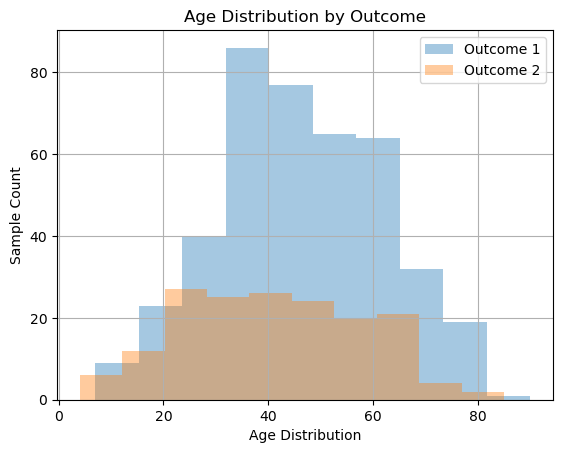

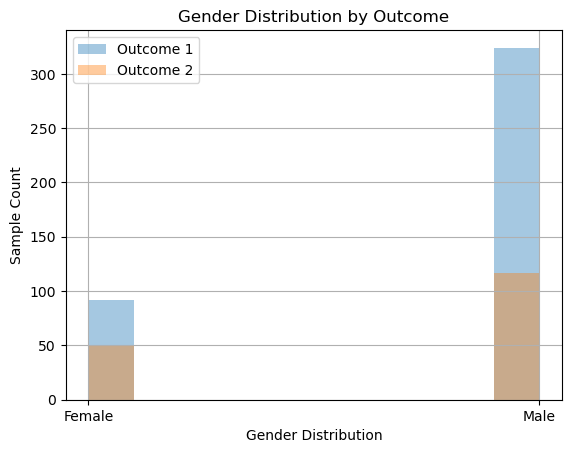

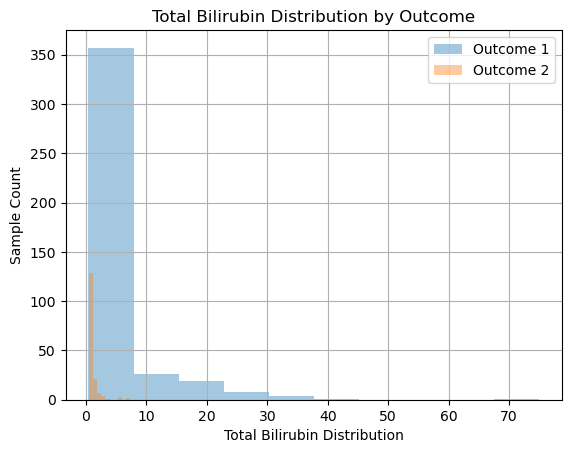

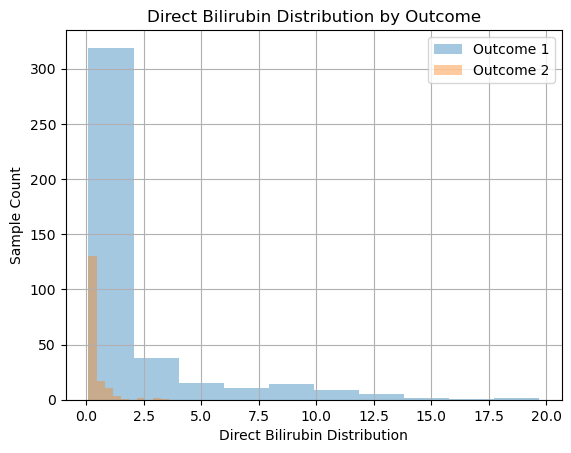

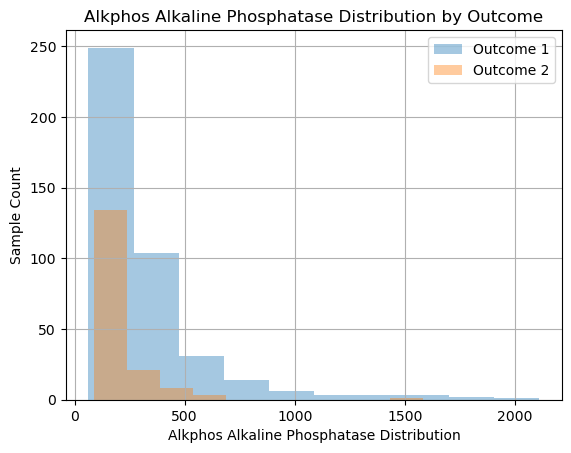

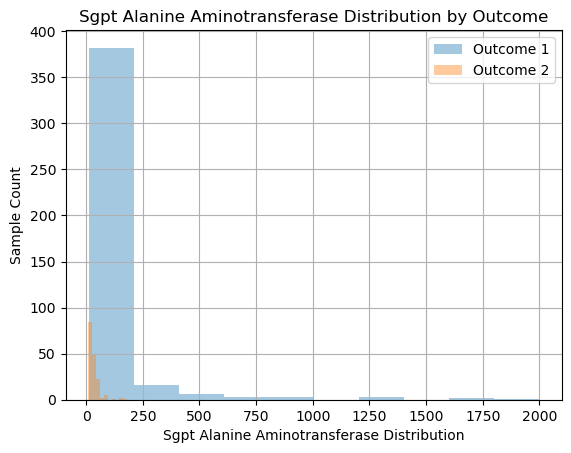

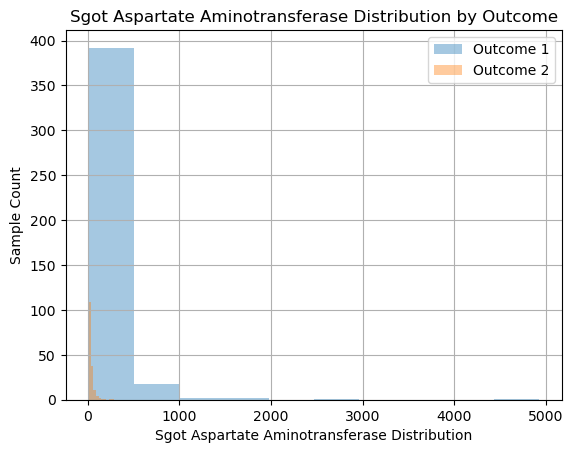

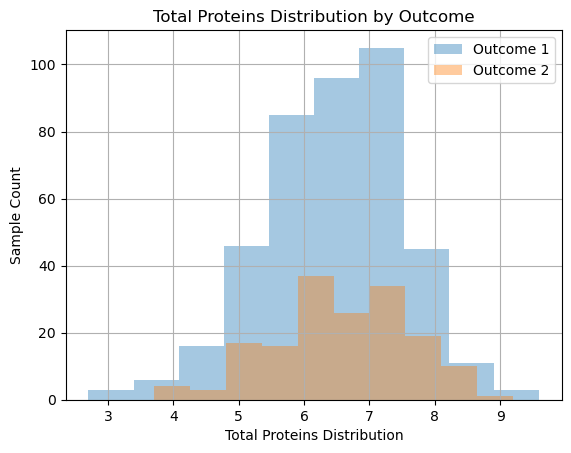

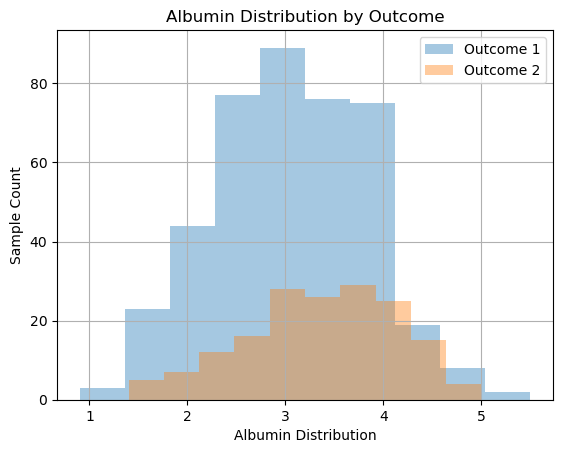

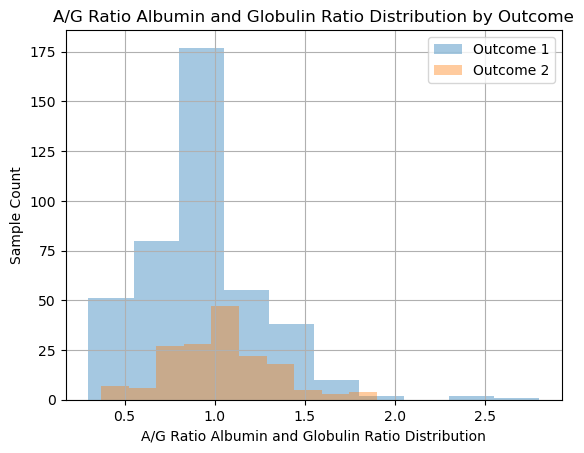

In [10]:
import matplotlib.pyplot as plt

# Loop over the column names (excluding the target variable)
for feature in liver_df.columns.drop('target'):
    # Group the DataFrame by 'Outcome' and create histograms for each feature
    liver_df.groupby('target')[feature].hist(alpha=0.4)
    plt.xlabel("{} Distribution".format(feature))
    plt.ylabel("Sample Count")
    plt.legend(['Outcome 1', 'Outcome 2'])
    plt.title("{} Distribution by Outcome".format(feature))
    plt.show()

Visually, it looks like total proteins have a different distribution between the 2 class groups

/Users/mennayoussef/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


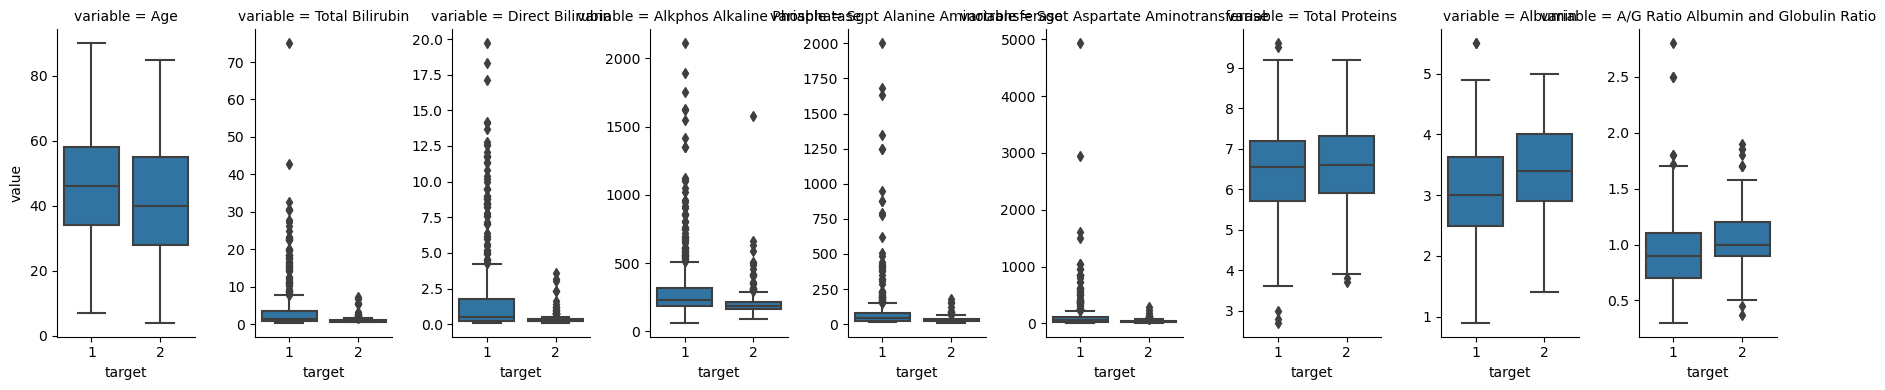

In [20]:
#melt the dataset
liver_df_m = pd.melt(liver_df, id_vars=["Gender","target"])
liver_df_m

g = sns.FacetGrid(liver_df_m, col="variable",height=4, aspect=.5, sharey=False)
g.map(sns.boxplot, "target", "value")
g.add_legend()
plt.show()


Albumin concentration has slightly different distribution between the 2 classes

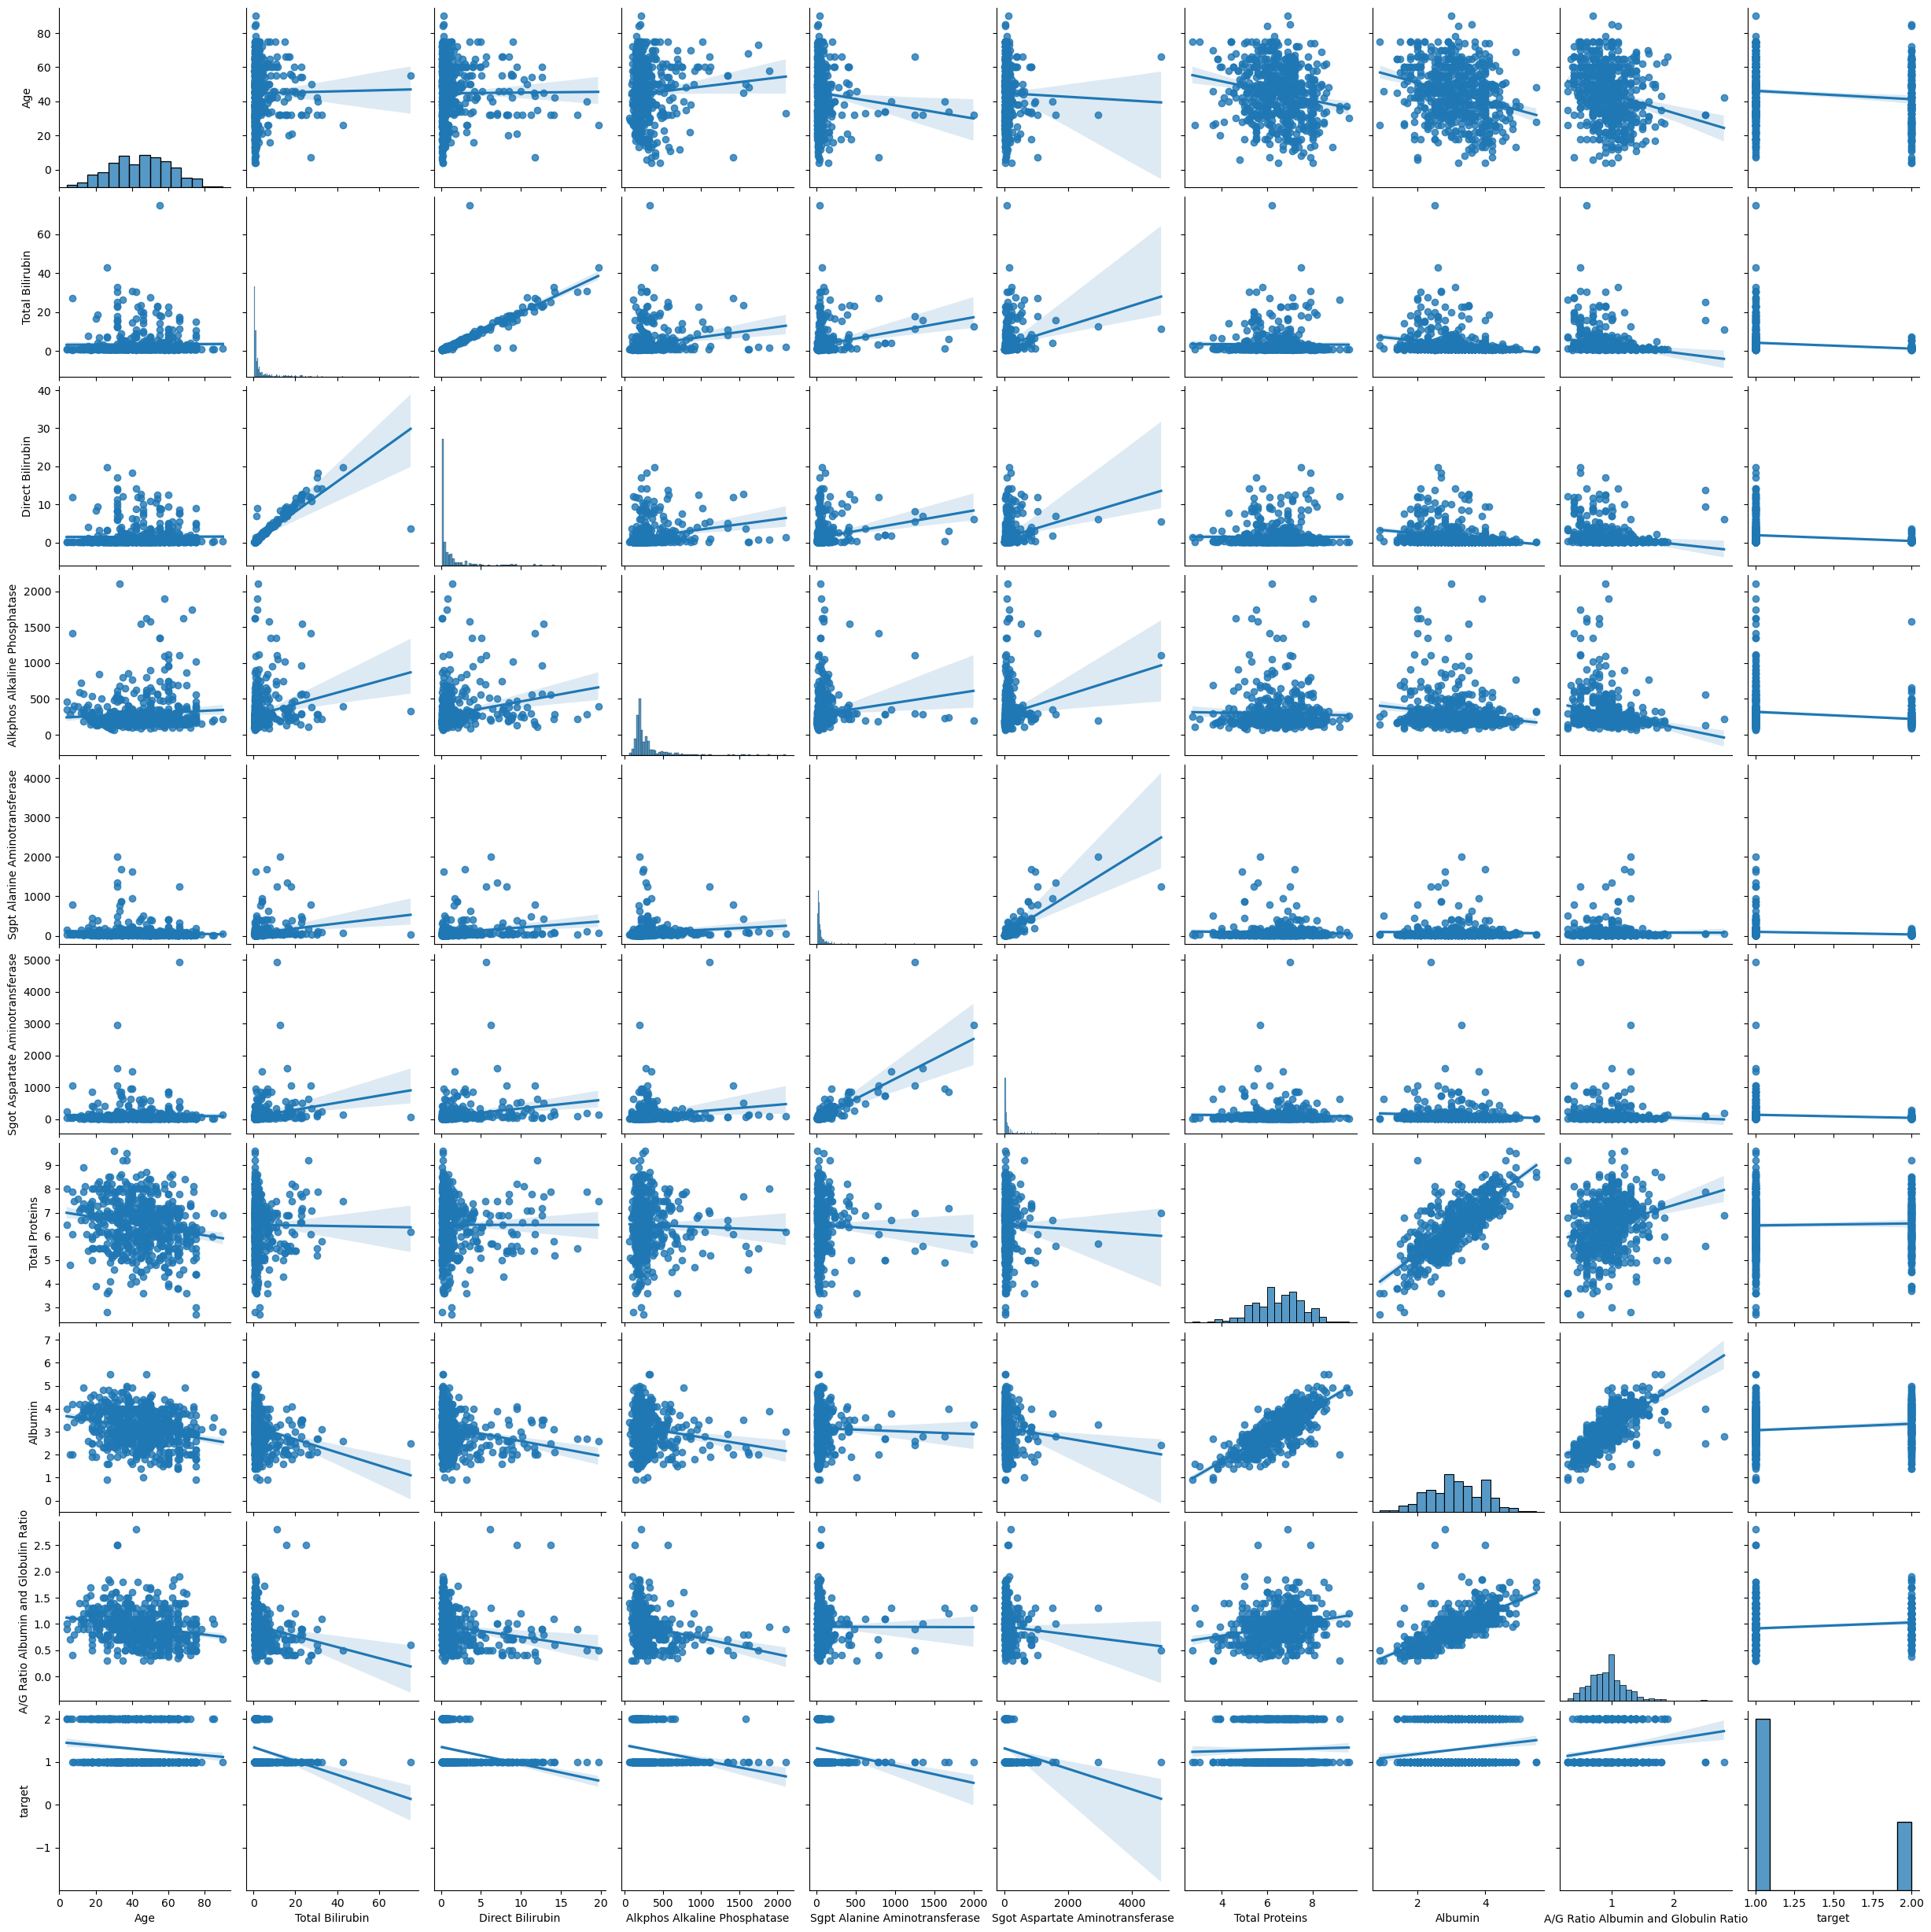

In [22]:
#Generate a pairwise scatterplot to investigate correlation between features. 
sns.pairplot(liver_df, kind="reg")

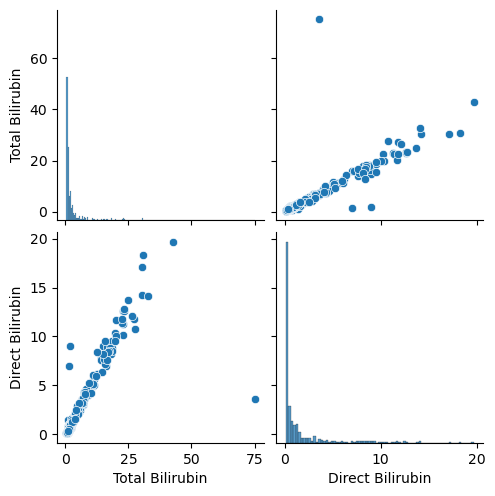

In [23]:
sns.pairplot(liver_df[["Total Bilirubin","Direct Bilirubin"]])

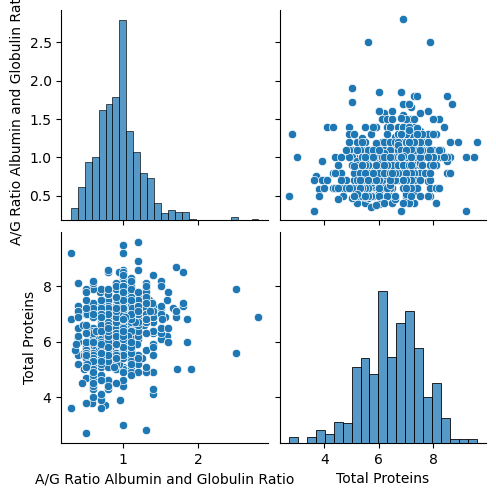

In [24]:
sns.pairplot(liver_df[["A/G Ratio Albumin and Globulin Ratio","Total Proteins"]])

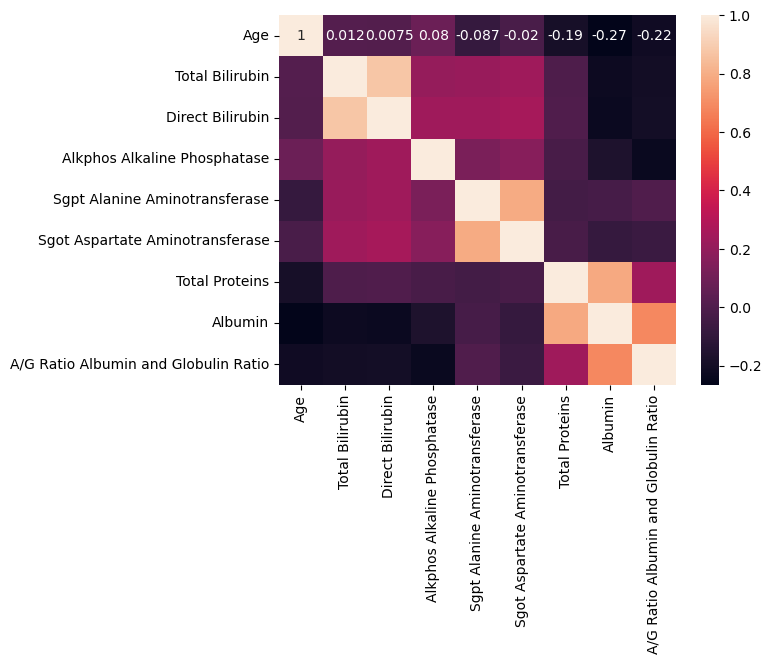

In [29]:
# Correlation heatmap
corr_mat = X.drop("Gender", axis=1).corr()

sns.heatmap(corr_mat, annot=True)
plt.show()

In [33]:
#features with correlation value > 0.5
highly_corr = []

for i in range(len(corr_mat.columns)):
    for j in range(i):
        if abs(corr_mat.iloc[i,j]) > 0.5:
            col_i = corr_mat.columns[i]
            col_j = corr_mat.columns[j]
            highly_corr.append(col_i)
            highly_corr.append(col_j)
            
highly_corr  

['Direct Bilirubin',
 'Total Bilirubin',
 'Sgot Aspartate Aminotransferase',
 'Sgpt Alanine Aminotransferase',
 'Albumin',
 'Total Proteins',
 'A/G Ratio Albumin and Globulin Ratio',
 'Albumin']

In [43]:
# df of highly correlated features
corr_df = X[highly_corr]
corr_df.head()

,Direct Bilirubin,Total Bilirubin,Sgot Aspartate Aminotransferase,Sgpt Alanine Aminotransferase,Albumin,Total Proteins,A/G Ratio Albumin and Globulin Ratio,Albumin
0,0.1,0.7,18.0,16.0,3.3,6.8,0.90,3.3
1,5.5,10.9,100.0,64.0,3.2,7.5,0.74,3.2
2,4.1,7.3,68.0,60.0,3.3,7.0,0.89,3.3
3,0.4,1.0,20.0,14.0,3.4,6.8,1.00,3.4
4,2.0,3.9,59.0,27.0,2.4,7.3,0.40,2.4


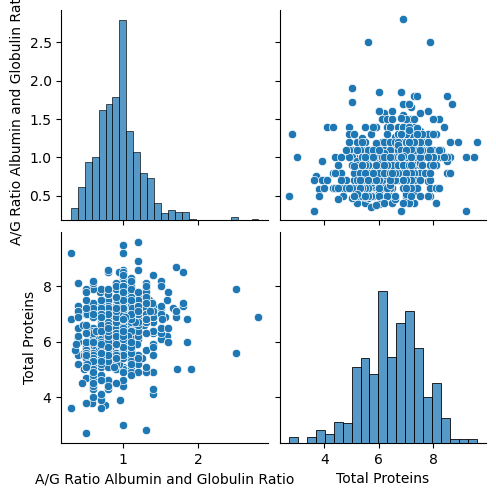

In [46]:
sns.pairplot(corr_df[["A/G Ratio Albumin and Globulin Ratio","Total Proteins"]])

In [50]:
#Convert Age (a continuous feature) in to a categorical one by binning the data into two disctinct bins (i) young (<= 50), and (ii) old ( > 50)
bin_edges=[0,50,float('inf')]
bin_labels= ['young','old']
liver_df['Age Category']= pd.cut(liver_df['Age'], bins=bin_edges, labels=bin_labels)

liver_df.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphatase,Sgpt Alanine Aminotransferase,Sgot Aspartate Aminotransferase,Total Proteins,Albumin,A/G Ratio Albumin and Globulin Ratio,target,age category,Age Category
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1,old,old
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1,old,old
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1,old,old
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1,old,old
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1,old,old


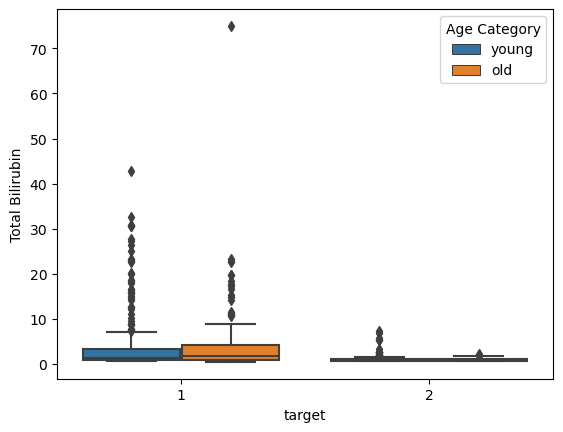

In [57]:
sns.boxplot(data=liver_df,x="target" ,y="Total Bilirubin" ,hue="Age Category")
plt.show()

There is no noticable difference in total bilirubin levels between the 2 age groups